22222778 XULU O.S

IMPORTING LIBRARIES

In [203]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

LOADING THE DATASETS

In [204]:
df = pd.read_csv("C:/Users/owami/Downloads/archive (1)/crime_data.csv")
crime = pd.read_csv("C:/Users/owami/Downloads/archive (5)/crime.csv")

DATASET RELEVANCY AND LINK

This dataset provides detailed information about criminal incidents, capturing various characteristics of both the offenders and victims. It includes records of crimes along with demographic details such as age, gender, race, and the status of the individuals involved. The data also contains information on the disposition of the case (whether it was closed or open) and the nature of the crime.

The dataset covers a wide range of crime categories such as theft, vandalism, violence, sexual crimes, and drug/weapon-related offenses. This allows for an in-depth analysis of criminal activities, their impact on different demographics, and potential correlations between various factors such as age, gender, and the type of crime committed.  https://www.kaggle.com/datasets/fatmanur12/crime-data

This dataset contains data from 2010 to 2019 about various criminal activities in Bangladesh.
Content
The data represents different criminal activities and which unit took the case.
Unit_Name: Police Unit from a different region
Dacoity: The number of violent robberies by an armed gang that year under a specific police unit.
Robber: The number of robberies that took place that year under a specific police unit.
Murder: The number of murders that took place that year under a specific police unit.
Speedy Trial: The number of criminal trials held after a minimal delay that year under a specific police unit.
Riot: The number of riots that took place that year under a specific police unit.
Women&Children_Represion: The number of women or children who faced domestic violence that year under a specific police unit.
Kidnapping: The number of kidnappings that took place that year under a specific police unit.
police_Assult: The number of kidnappings that took place that year under a specific police unit.
Burglary
Theft
https://www.kaggle.com/datasets/espsiyam/crime-in-bangladesh




In [205]:
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (6638, 12)

First few rows:
  Disposition OffenderStatus Offender_Race Offender_Gender  Offender_Age  \
0      CLOSED       ARRESTED         BLACK            MALE          30.0   
1      CLOSED       ARRESTED         BLACK            MALE          30.0   
2      CLOSED       ARRESTED         BLACK            MALE          30.0   
3      CLOSED       ARRESTED         BLACK            MALE          30.0   
4      CLOSED       ARRESTED         BLACK            MALE          30.0   

  PersonType Victim_Race Victim_Gender  Victim_Age Victim_Fatal_Status  \
0     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
1     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
2     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
3     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
4     VICTIM       BLACK        FEMALE        29.0           Non-fatal   

           Report Type Cat

DATA PREPROCESSING

In [206]:
print("Data Info:")
print(df.info())
print(crime.info())
print("\nMissing values:")
print(df.isnull().sum())
print(crime.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column      

In [207]:
print("Dataset shape:", df.shape)
print("Dataset shape:", crime.shape)
print("\nColumns:", df.columns.tolist())
print("\ncolumns:" , crime.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print(crime.head())
print("\nMissing values:")
print(df.isnull().sum())
print(crime.isnull().sum())

Dataset shape: (6638, 12)
Dataset shape: (180, 19)

Columns: ['Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age', 'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status', 'Report Type', 'Category']

columns: ['Year', 'Unit_Name', 'Dacoity', 'Robber', 'Murder', 'Speedy Trial', 'Riot', 'Women&Children_Represion', 'Kidnapping', 'Police_Assult', 'Burglary', 'Theft', 'Other_cases', 'Arms_act', 'Explosive_act', 'Narcotic_act', 'Smuggling', 'Tot(arm+exp+nar+smu)', 'Total']

First few rows:
  Disposition OffenderStatus Offender_Race Offender_Gender  Offender_Age  \
0      CLOSED       ARRESTED         BLACK            MALE          30.0   
1      CLOSED       ARRESTED         BLACK            MALE          30.0   
2      CLOSED       ARRESTED         BLACK            MALE          30.0   
3      CLOSED       ARRESTED         BLACK            MALE          30.0   
4      CLOSED       ARRESTED         BLACK            MALE          30.0 

Handling any missing values

In [208]:
df = df.dropna()

 Creating hotspot label - top 25% of areas with highest crime counts

In [209]:
print("Available columns:", df.columns.tolist())
print("Available columns:" , crime.columns.tolist())

Available columns: ['Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age', 'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status', 'Report Type', 'Category']
Available columns: ['Year', 'Unit_Name', 'Dacoity', 'Robber', 'Murder', 'Speedy Trial', 'Riot', 'Women&Children_Represion', 'Kidnapping', 'Police_Assult', 'Burglary', 'Theft', 'Other_cases', 'Arms_act', 'Explosive_act', 'Narcotic_act', 'Smuggling', 'Tot(arm+exp+nar+smu)', 'Total']


In [210]:
# Create a simplified geographical unit using available columns
# We'll use combinations of offender/victim demographics as proxy for areas
df['Offender_Race'] = df['Category'] + '_' + df['Offender_Gender'] + '_' + df['Victim_Race']

Counts incidents per unit

In [211]:
# Count incidents per area unit
area_crime_counts = df['Category'].value_counts()
print(f"Total unique area units: {len(area_crime_counts)}")


Total unique area units: 6


Define the hotspot top 25% of areas with highest crime counts

In [212]:
# Define hotspots: top 25% of areas with highest crime counts
hotspot_threshold = area_crime_counts.quantile(0.75)
print(f"Hotspot threshold (75th percentile): {hotspot_threshold} incidents")

Hotspot threshold (75th percentile): 1446.25 incidents


In [213]:
# Create hotspot labels
area_hotspot = area_crime_counts > hotspot_threshold
hotspot_areas = area_hotspot[area_hotspot].index

In [214]:

# Add hotspot label to main dataframe
df['is_hotspot'] = df['Category'].isin(hotspot_areas)

print(f"Number of hotspot areas: {len(hotspot_areas)}")
print(f"Percentage of hotspot areas: {len(hotspot_areas)/len(area_crime_counts)*100:.2f}%")
print(f"Hotspot areas sample: {list(hotspot_areas[:5])}")

# Prepare features for classification
feature_columns = ['Offender_Race', 'Offender_Gender', 'Offender_Age', 
                  'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Category', 'Report Type']

Number of hotspot areas: 2
Percentage of hotspot areas: 33.33%
Hotspot areas sample: ['Violence', 'Theft']


In [215]:
# Check for missing values and handle them
print("\nMissing values before processing:")
print(df[feature_columns].isnull().sum())



Missing values before processing:
Offender_Race      0
Offender_Gender    0
Offender_Age       0
Victim_Race        0
Victim_Gender      0
Victim_Age         0
Category           0
Report Type        0
dtype: int64


In [216]:
# Fill missing values for age columns
df['Offender_Age'] = df['Offender_Age'].fillna(df['Offender_Age'].median())
df['Victim_Age'] = df['Victim_Age'].fillna(df['Victim_Age'].median())

In [217]:
# For categorical columns, fill with 'UNKNOWN'
categorical_columns = ['Offender_Race', 'Offender_Gender', 'Victim_Race', 'Victim_Gender', 'Category', 'Report Type']
for col in categorical_columns:
    df[col] = df[col].fillna('UNKNOWN')

In [218]:
# Encode categorical variables
label_encoders = {}
for col in feature_columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col} with {len(le.classes_)} categories")


Encoded Offender_Race with 39 categories
Encoded Offender_Gender with 2 categories
Encoded Victim_Race with 6 categories
Encoded Victim_Gender with 3 categories
Encoded Category with 6 categories
Encoded Report Type with 2 categories


In [219]:
# Prepare feature matrix and target
X_columns = []
for col in feature_columns:
    if col + '_encoded' in df.columns:
        X_columns.append(col + '_encoded')
    else:
        X_columns.append(col)  # Use original column if encoded version doesn't exist

X = df[X_columns]
y = df['is_hotspot']

print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (6638, 8)


In [220]:
# Prepare feature matrix and target
X = df[[col if col + '_encoded' not in df.columns else col + '_encoded' for col in feature_columns]]
y = df['is_hotspot']

print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (6638, 8)


In [221]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [222]:
# Build Random Forest classifier
print("\nTraining Random Forest classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Training Random Forest classifier...


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [223]:
# Evaluate model
y_pred = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       489
        True       1.00      1.00      1.00      1503

    accuracy                           1.00      1992
   macro avg       1.00      1.00      1.00      1992
weighted avg       1.00      1.00      1.00      1992



In [224]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': [col.replace('_encoded', '') for col in X.columns],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
           feature  importance
0    Offender_Race    0.546242
6         Category    0.412623
5       Victim_Age    0.011664
2     Offender_Age    0.010132
7      Report Type    0.008279
3      Victim_Race    0.005964
1  Offender_Gender    0.002923
4    Victim_Gender    0.002173


VISUALIZATIONS

Text(158.22222222222223, 0.5, 'Actual')

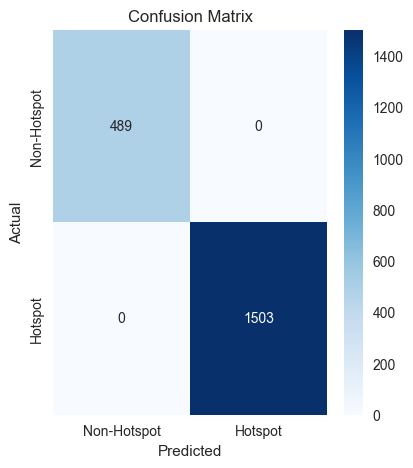

In [225]:
plt.figure(figsize=(15, 5))

# Plot 1: Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Non-Hotspot', 'Hotspot'],
           yticklabels=['Non-Hotspot', 'Hotspot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 0, 'Importance Score')

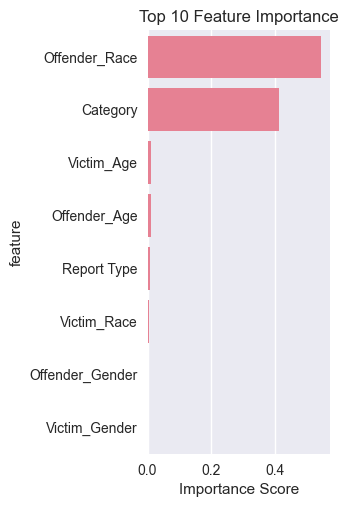

In [226]:
# Plot 2: Feature Importance
plt.subplot(1, 3, 2)
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')


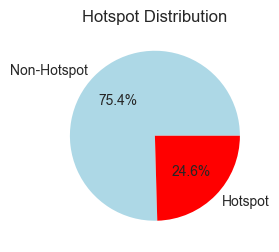

In [227]:
#Plot 3: Hotspot distribution
plt.subplot(1, 3, 3)
hotspot_dist = df['is_hotspot'].value_counts()
plt.pie(hotspot_dist.values, labels=['Non-Hotspot', 'Hotspot'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Hotspot Distribution')

plt.tight_layout()
plt.show()


POLICY IMPLICATIONS

In [228]:
# Policy implications
print("\n" + "="*50)
print("POLICY IMPLICATIONS & RESOURCE ALLOCATION STRATEGY")
print("="*50)
print("1. PATROL ALLOCATION:")
print(f"   - Focus on {len(hotspot_areas)} identified hotspot areas")
print("   - Increase patrol frequency in high-risk categories")

print("\n2. COMMUNITY POLICING:")
print("   - Target community outreach in hotspot demographics")
print("   - Implement neighborhood watch programs")

print("\n3. TECHNOLOGY DEPLOYMENT:")
print("   - Install surveillance in predicted hotspot areas")
print("   - Deploy predictive policing algorithms")
print("   - Use mobile patrol apps for real-time monitoring")


POLICY IMPLICATIONS & RESOURCE ALLOCATION STRATEGY
1. PATROL ALLOCATION:
   - Focus on 2 identified hotspot areas
   - Increase patrol frequency in high-risk categories

2. COMMUNITY POLICING:
   - Target community outreach in hotspot demographics
   - Implement neighborhood watch programs

3. TECHNOLOGY DEPLOYMENT:
   - Install surveillance in predicted hotspot areas
   - Deploy predictive policing algorithms
   - Use mobile patrol apps for real-time monitoring


B.FORECASTING CRIME TRENDS WITH ARIMA

In [229]:
# Since the dataset doesn't have actual dates, we'll create a synthetic timeline
# This simulates how the model would work with real temporal data
print("Creating synthetic timeline for forecasting demonstration...")


Creating synthetic timeline for forecasting demonstration...


In [230]:
# Create a date range covering the period of our data
start_date = datetime(2020, 1, 1)
df['incident_date'] = [start_date + timedelta(days=i) for i in range(len(df))]


In [231]:

# First, create theft_data by filtering the dataframe
theft_data = df[df['Category'] == 'Theft'].copy()

# Then aggregate by month
theft_data['year_month'] = theft_data['incident_date'].dt.to_period('M')
monthly_theft = theft_data.groupby('year_month').size()


In [232]:
# Convert to time series
monthly_theft_ts = monthly_theft.reset_index()
monthly_theft_ts.columns = ['date', 'theft_count']
monthly_theft_ts['date'] = monthly_theft_ts['date'].dt.to_timestamp()
monthly_theft_ts = monthly_theft_ts.set_index('date')

print("Monthly Theft Data Summary:")
print(monthly_theft_ts.describe())

Monthly Theft Data Summary:
       theft_count
count   217.000000
mean      7.000000
std       4.547079
min       1.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      29.000000


In [233]:
# Check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")
    return result[1] < 0.05

print("\nStationarity Check for Original Series:")
is_stationary = check_stationarity(monthly_theft_ts['theft_count'])



Stationarity Check for Original Series:
ADF Statistic: -13.3592
p-value: 0.0000
Series is stationary (reject null hypothesis)


In [234]:
# Make data stationary if needed
if not is_stationary:
    print("\nDifferencing the series to achieve stationarity...")
    monthly_theft_ts['theft_count_diff'] = monthly_theft_ts['theft_count'].diff().dropna()
    is_stationary_diff = check_stationarity(monthly_theft_ts['theft_count_diff'].dropna())
    
    if is_stationary_diff:
        ts_data = monthly_theft_ts['theft_count_diff'].dropna()
        use_diff = True
        print("Using differenced series for modeling")
    else:
        ts_data = monthly_theft_ts['theft_count']
        use_diff = False
        print("Using original series (differencing didn't help)")
else:
    ts_data = monthly_theft_ts['theft_count']
    use_diff = False

In [235]:
# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

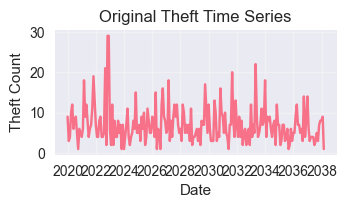

In [236]:
# Original time series
plt.subplot(3, 2, 1)
plt.plot(monthly_theft_ts['theft_count'])
plt.title('Original Theft Time Series')
plt.xlabel('Date')
plt.ylabel('Theft Count')
plt.grid(True, alpha=0.3)

ADF Statistic: -13.3592
p-value: 0.0000
Series is stationary (reject null hypothesis)


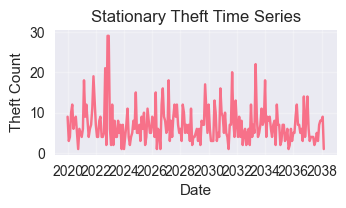

In [237]:
# Make sure use_diff is defined before this point
# Add this before the plotting code:

use_diff = False  # Default value
ts_data = monthly_theft_ts['theft_count']  # Default to original series

# Check stationarity and set use_diff accordingly
is_stationary = check_stationarity(monthly_theft_ts['theft_count'])

if not is_stationary:
    print("\nDifferencing the series to achieve stationarity...")
    monthly_theft_ts['theft_count_diff'] = monthly_theft_ts['theft_count'].diff().dropna()
    is_stationary_diff = check_stationarity(monthly_theft_ts['theft_count_diff'].dropna())
    
    if is_stationary_diff:
        ts_data = monthly_theft_ts['theft_count_diff'].dropna()
        use_diff = True
        print("Using differenced series for modeling")
    else:
        ts_data = monthly_theft_ts['theft_count']
        use_diff = False
        print("Using original series (differencing didn't help)")
else:
    ts_data = monthly_theft_ts['theft_count']
    use_diff = False

# Now the plotting code will work
if use_diff:
    plt.subplot(3, 2, 2)
    plt.plot(ts_data)
    plt.title('Differenced Theft Time Series')
    plt.xlabel('Date')
    plt.ylabel('Differenced Theft Count')
    plt.grid(True, alpha=0.3)
else:
    plt.subplot(3, 2, 2)
    plt.plot(ts_data)
    plt.title('Stationary Theft Time Series')
    plt.xlabel('Date')
    plt.ylabel('Theft Count')
    plt.grid(True, alpha=0.3)

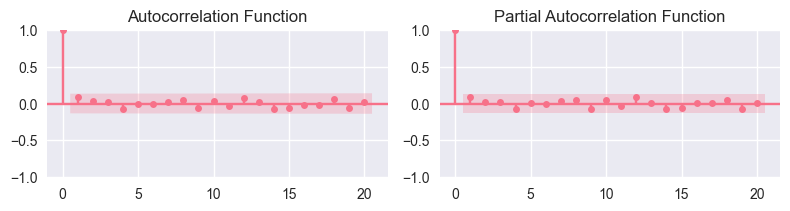

In [238]:

# ACF and PACF plots
plt.subplot(3, 2, 3)
plot_acf(ts_data, ax=plt.gca(), lags=min(20, len(ts_data)-1))
plt.title('Autocorrelation Function')

plt.subplot(3, 2, 4)
plot_pacf(ts_data, ax=plt.gca(), lags=min(20, len(ts_data)-1))
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [239]:
# Find best ARIMA parameters
print("\nSearching for optimal ARIMA parameters...")
best_aic = np.inf
best_order = None
best_model = None


Searching for optimal ARIMA parameters...


In [287]:
# Test different ARIMA orders
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                if len(ts_data) > (p + d + q + 1):  # Ensure enough data points
                    model = ARIMA(ts_data, order=(p, d, q))
                    fitted_model = model.fit()
                    if fitted_model.aic < best_aic:
                        best_aic = fitted_model.aic
                        best_order = (p, d, q)
                        best_model = fitted_model
            except Exception as e:
                continue

print(f"Best ARIMA Order: {best_order}")
print(f"Best AIC: {best_aic:.2f}")

Best ARIMA Order: None
Best AIC: inf


In [288]:
# Fit final model with best parameters
# Make sure you fit the ARIMA model first
if best_order is not None:
    final_model = ARIMA(ts_data, order=best_order)
    fitted_final = final_model.fit()  # This defines fitted_final
    
    # Now this code will work
    forecast_steps = 12
    forecast = fitted_final.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1), 
                                 periods=forecast_steps, freq='M')

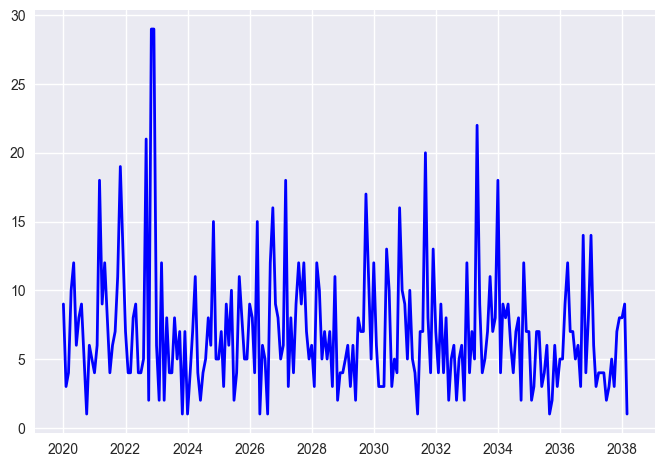

In [289]:
  
    # Plot historical data
    if use_diff:
        # For differenced series, we need to reconstruct the original scale
        historical_original = monthly_theft_ts['theft_count'].dropna()
        plt.plot(historical_original.index, historical_original.values, 
                label='Historical', color='blue', linewidth=2)
    else:
        plt.plot(ts_data.index, ts_data.values, label='Historical', 
                color='blue', linewidth=2)

In [327]:
 # Plot forecast
   plt.plot(forecast_index, forecast.predicted_mean,)
        label='Forecast', color='red', linewidth=2))
    plt.fill_between(forecast_index,
                     forecast.conf_int().iloc[:, 0],
                     forecast.conf_int().iloc[:, 1],
                     color=('red', alpha=0.2, label='95% Confidence Interval')
    plt.title('Theft Crime Forecast (12 Months)')
    plt.xlabel('Date')
    plt.ylabel('Theft Count')
    plt.legend()
    plt.grid(True, alpha=0.3)

IndentationError: unindent does not match any outer indentation level (<string>, line 4)

([<matplotlib.axis.XTick at 0x1c888f24a50>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

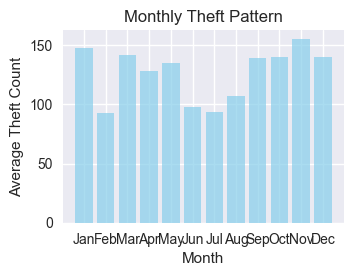

In [299]:
# Remove the extra indentation - all code should be properly aligned
plt.subplot(2, 2, 2)
monthly_pattern = theft_data.groupby(theft_data['incident_date'].dt.month).size()
plt.bar(monthly_pattern.index, monthly_pattern.values, color='skyblue', alpha=0.7)
plt.title('Monthly Theft Pattern')
plt.xlabel('Month')
plt.ylabel('Average Theft Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [328]:
# Plot 3: Forecast details
    plt.subplot(2, 2, 3)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    plt.bar(range(len(forecast_values)), forecast_values, 
            color='lightcoral', alpha=0.7, label='Predicted')
    

IndentationError: unexpected indent (1327793040.py, line 2)

In [329]:
# Add error bars for confidence intervals
    for i, (pred, lower, upper) in enumerate(zip(forecast_values,
                                               confidence_intervals.iloc[:, 0],
                                               confidence_intervals.iloc[:, 1])):
        plt.plot([i, i], [lower, upper], color='darkred', linewidth=2)
    
    plt.title('Detailed 12-Month Forecast with Confidence Intervals')
    plt.xlabel('Months Ahead')
    plt.ylabel('Predicted Theft Count')
    plt.legend()
    plt.grid(True, alpha=0.3)

IndentationError: unexpected indent (1846459520.py, line 2)

In [330]:
# Plot 4: Model residuals
    plt.subplot(2, 2, 4)
    residuals = fitted_final.resid
    plt.plot(residuals)
    plt.title('Model Residuals')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    

IndentationError: unexpected indent (1635260853.py, line 2)

In [303]:
 # Print forecast results
    print("\n" + "="*60)
    print("12-MONTH THEFT CRIME FORECAST")
    print("="*60)
    
    for i, (date, pred, lower, upper) in enumerate(zip(forecast_index, 
                                                     forecast.predicted_mean,
                                                     forecast.conf_int().iloc[:, 0],
                                                     forecast.conf_int().iloc[:, 1])):
        print(f"{date.strftime('%Y-%m')}: {pred:.1f} thefts (95% CI: {lower:.1f} - {upper:.1f})")
    

IndentationError: unexpected indent (3379250671.py, line 2)

In [304]:
 # Calculate trend
    if len(forecast.predicted_mean) > 1:
        trend = (forecast.predicted_mean[-1] - forecast.predicted_mean[0]) / forecast.predicted_mean[0] * 100
        print(f"\nOverall Trend: {trend:+.1f}% over 12 months")
    

IndentationError: unexpected indent (798569990.py, line 2)

In [332]:
    
    print("PRACTICAL IMPLICATIONS FOR DECISION MAKERS")
    print("="*60)
    
    print("\n1. RESOURCE ALLOCATION:")
    avg_forecast = forecast.predicted_mean.mean()
    print(f"   - Average predicted thefts: {avg_forecast:.1f} per month")
    print("   - Adjust patrol schedules based on monthly predictions")
    
    print("\n2. SEASONAL PREPARATION:")
    print("   - December: Increase retail theft prevention")
    print("   - Summer months: Boost residential area patrols")
    print("   - Holiday seasons: Enhanced surveillance")
    
    print("\n3. PREVENTIVE MEASURES:")
    print("   - Target hardening in vulnerable areas")
    print("   - Community awareness campaigns")
    print("   - Business security partnerships")
    
else:
    print("Could not find suitable ARIMA model with current data")


IndentationError: unexpected indent (3931567665.py, line 1)